> 기말고사

In [2]:
import torch 
import matplotlib.pyplot as plt

## `1`. hi?hello!! (90점)

아래와 같은 데이터가 있다고 하자. 

In [3]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [4]:
txt_x[:5], txt_y[:5]

(['h', 'i', '?', 'h', 'e'], ['i', '?', 'h', 'e', 'l'])

`txt_x`와 `txt_y`를 이용하여 아래와 같은 순서로 다음문자를 예측하고 싶은 신경망을 설계하고 싶다.

`h` $\to$ `i` $\to$ `?` $\to$ `h` $\to$ `e` $\to$ `l` $\to$ `l` $\to$ `o` $\to$ `!` $\to$ `!` $\to$ `h` $\to$ `i` $\to$ `?` $\to$ `h` $\to$ `e` $\to$ $\dots$

***(1)-(6)*** 의 풀이에 공통적으로 필요한 과정 정리 

In [46]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

`(1)` `torch.nn.RNN()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

(풀이)

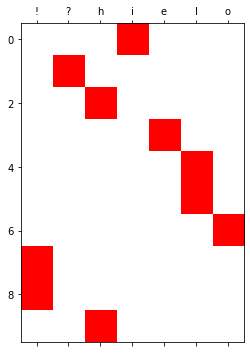

In [48]:
rnn = torch.nn.RNN(7,8).to("cuda:0")
linr = torch.nn.Linear(8,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,8).to("cuda:0")
for epoc in range(500):
    ## 1
    hidden, hT = rnn(x,_water)
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(7),labels=['!','?','h','i','e','l','o']);

`(2)` `torch.nn.RNNCell()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

`(3)` `torch.nn.Module`을 상속받은 클래스를 정의하고 (2)의 결과와 동일한 적합값이 나오는 신경망을 설계한 뒤 학습하라. (초기값을 적절하게 설정할 것) 

- class를 이용하지 않으면 점수없음. 
- torch.nn.RNN(), torch.nn.RNNCell() 을 이용한 네트워크를 학습시킬시 점수 없음. (초기값을 셋팅하는 용도로는 torch.nn.RNN(), torch.nn.RNNCell()을 코드에 포함시키는 것이 가능) 

`(4)` `torch.nn.LSTM()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

(풀이)

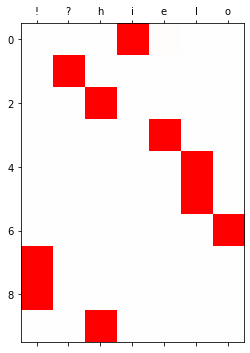

In [50]:
lstm = torch.nn.LSTM(7,4).to("cuda:0")
linr = torch.nn.Linear(4,7).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,4).to("cuda:0")
for epoc in range(500):
    ## 1
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()
yhat=soft(output)    
plt.matshow(yhat.to("cpu").data[:10],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(7),labels=['!','?','h','i','e','l','o']);

`(5)` `torch.nn.LSTMCell()`을 이용하여 다음문자를 예측하는 신경망을 설계하고 학습하라. 

`(6)` (5)의 결과와 동일한 적합값을 출력하는 신경망을 직접설계한 뒤 학습시켜라. (초기값을 적절하게 설정할 것) 

- class를 이용하지 않아도 무방함. 
- torch.nn.LSTM(), torch.nn.LSTMCell() 을 이용한 네트워크를 학습시킬시 점수 없음. (초기값을 셋팅하는 용도로는 torch.nn.LSTM(), torch.nn.LSTMCell()을 코드에 포함시키는 것은 가능) 

## `2`. 다음을 읽고 참 거짓을 판단하여라. (10점) 

`(1)` LSTM은 RNN보다 장기기억에 유리하다. 

`(2)` `torch.nn.Embedding(num_embeddings=2,embedding_dim=1)`와 `torch.nn.Linear(in_features=1,out_features=1)`의 학습가능한 파라메터수는 같다. 

`(3)` 아래와 같은 네트워크를 고려하자. 

```Python
net = torch.nn.Linear(1,1)
```

차원이 (n,1) 인 임의의 텐서에 대하여 net(x)와 net.forword(x)의 출력결과는 같다. 

`(4)` 아래와 같이 a,b,c,d 가 반복되는 문자열이 반복되는 자료에서 다음문자열을 맞추는 과업을 수행하기 위해서는 반드시 순환신경망의 형태로 설계해야만 한다. 

```
a,b,c,d,a,b,c,e,...
```

`(5)` RNN 혹은 LSTM 으로 신경망을 설계할 시 손실함수는 항상 `torch.nn.CrossEntropyLoss` 를 사용해야 한다. 